Import the NumPy and Matplotlib modules:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Exercise 08.1 (function plotting)

Consider the function 
$$
f(x) = e^{x/10} \sin(\omega_{1}x)\cos(\omega_{0}x)
$$
from $x = -4\pi$ to $x = 4\pi$.

(1) Plot the function when $\omega_{0} = \omega_{1} = 1$. Label the axes.

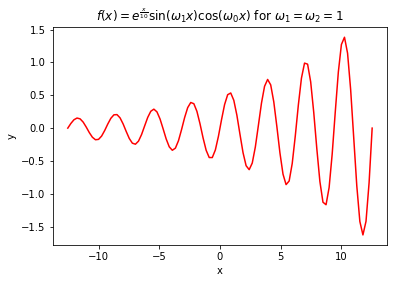

In [2]:
num_points = 100
x = np.linspace(-4*np.pi, 4*np.pi, num=num_points)

f = np.exp(x/10)*np.sin(x)*np.cos(x)
# YOUR CODE HERE
plt.plot(x,f,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x) = e^{\frac{x}{10}} \sin(\omega_{1}x)\cos(\omega_{0}x)$ for $\omega_{1} = \omega_{2} = 1$')
plt.show()

(2) Create an interactive plot with sliders for $\omega_{0}$ and $\omega_{1}$, varying from 0 to 2.

In [3]:
from ipywidgets import interact

# YOUR CODE HERE
@interact(ω_1 = (0,2,0.25), ω_2 = (0,2,0.25))
def plot(ω_1 = 1, ω_2 = 1):
    x = np.linspace(-4*np.pi, 4*np.pi, num=num_points)
    f = np.exp(x/10)*np.sin(ω_1*x)*np.cos(ω_2*x)
    plt.plot(x,f,'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r"$f(x) = e^{\frac{x}{10}} \sin(\omega_{1}x)\cos(\omega_{0}x)$ for $\omega_1$ = {}, $\omega_2$ = {}") #.format(ω_1,ω_2) Not working
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='ω_1', max=2.0, step=0.25), FloatSlider(value=1.0, de…

## Exercise 08.2 (multiple function plotting)

Plot the function 

$$
f(x)  = \frac{\sin(x)}{x}
$$

from $x = -6\pi$ to $x = 6\pi$. Think carefully about which $x$ values you use when 
$x$ is close to zero.
  
Add to the above plot the graph of $1/ \left| x \right|$, and limit the range of the $y$ axis to 1 using
`plt.ylim`. (Hint: use `np.abs(x)` to return the absolute values of each 
component of a NumPy array `x`.)

[]

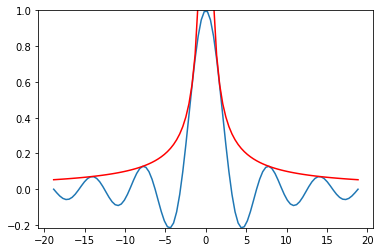

In [4]:
# YOUR CODE HERE
x = np.linspace(-6*np.pi, 6*np.pi, 100) # Doesn't include 0
f1 = np.sin(x) / x
f2 = 1 / np.abs(x)
plt.plot(x,f1)
plt.plot(x,f2,'r')
plt.ylim(f1.min(),1)
plt.plot()

## Exercise 08.3 (demographics and interactive plotting)

A county planning body has requested an interactive tool to visualise the population distribution in Cambridgeshire (by district) from 2011 to 2021 for different population growth rate scenarios in each district. It can be assumed that:

- the growth rates are constant in each district;
- the growth rate will not be negative in any district; and 
- the annual growth rate in any one district will not exceed 10%.

Building on the pie chart example with population data in the Activity notebook, create an interactive plot with:

1. A slider for the year (from 2011 to 2021); and
2. Sliders for the annual population growth for each district (in percentage), with an 
   initial value of zero for each district.

### Solution

There are number of ways this exercise could be done, from very simple but not very robust with respect to changes in the order of the input data, to quite techical but robust with repsect to the order in which data is entered.

In [5]:
#from ipywidgets import interact

# List of (district, population) data (in 2011)
population_data = (('Cambridge City', 123900), 
                   ('East Cambridgeshire', 83800), 
                   ('Fenland', 95300), 
                   ('Huntingdonshire', 169500), 
                   ('South Cambridgeshire', 148800))
data_labels = [i[0] for i in population_data]

# YOUR CODE HERE
@interact(yr=(2011,2021,1), cc=(0,10,1), ec=(0,10,1), f=(0,10,1), h=(0,10,1), sc=(0,10,1))
def plot(yr=2011,cc=0,ec=0,f=0,h=0,sc=0):
    lbls_to_abb = {"Cambridge City":cc, "East Cambridgeshire":ec, "Fenland":f, "Huntingdonshire":h, "South Cambridgeshire":sc} # probs could've had a 2d array for the values storing the population value as well
    new_pop_data = []
    for item in population_data:
        new_pop_data.append(item[1] * (1+(lbls_to_abb[item[0]])) ** (yr - 2011))
    plt.pie(new_pop_data, labels=data_labels, autopct='%1.1f%%')
    plt.title("Population Distribution in Cambridgeshire in Year {}".format(yr))
    plt.show()
    

interactive(children=(IntSlider(value=2011, description='yr', max=2021, min=2011), IntSlider(value=0, descript…

## Exercise 08.4 (crime reports by location)

### Background

Your task is to produce a crime report data plot in the neighborhood of your college, by reported crime
category.

We can get crime data in the UK from the police data systems using what is known as a *REST API*,
and turn the data into a list of Python dictionaries. Each entry in the list is a police report 
(an entry is a Python dictionary detailing the report).

The first step is to import the modules we will be using:

In [6]:
import json
import requests

The service https://data.police.uk has an interface where we can add specific strings to the URL (web address) to define what data we are intersted in, and the police server will return our requested data. The format is

    https://data.police.uk/api/crimes-street/all-crime?lat=52.629729&lng=-1.131592&date=2017-01
    
This return crimes reports within a mile radius of the geographic coordinate point for the month `2017-01`.          

Below we create this URL string to include a part of the Cambridge city centre. You can modify this for your own college or other areas of interest (Google Maps is a handy way to get the geographic coordinates).

# WHY R LAT AND LONG THE WRONG WAY ROUND?

In [7]:
# A point in the Cambridge city centre
long, lat = 52.205277, 0.119117

# year-month of interest
year_month = '2019-05'

# Construct request URL string
url = "https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}".format(long, lat, year_month)

# Fetch data from https://data.police.uk
r = requests.get(url)

The following converts the fetched data into a list of dictionaries:

In [8]:
crime_data = r.json()

To get an idea of how the data is arranged, we can look at the first report in the list. To make the displayed data easier to read, we use the 'pretty print' module `pprint`.

In [9]:
import pprint
if crime_data:
    pprint.pprint(crime_data[3])

{'category': 'anti-social-behaviour',
 'context': '',
 'id': 74130085,
 'location': {'latitude': '52.204688',
              'longitude': '0.121326',
              'street': {'id': 560744, 'name': 'On or near Nightclub'}},
 'location_subtype': '',
 'location_type': 'Force',
 'month': '2019-05',
 'outcome_status': None,
 'persistent_id': ''}


Each dictionary item corresponds to a reported crime.

### Task

Produce a bar chart of the number of reports in different categories. Run your program for different parts of Cambridge, starting with the area around your college, and for different months and years.

#### Hints

Create an empty dictionary, which will eventually map the report category to the number of incidents:

In [10]:
categories_freq = {}

Iterate over all reports in the list, and extract the category string from each report. If the category string (the 'key') is already in the dictionary increment the associated counter. Otherwise add the key to the dictionary, and associate the value 1.

In [11]:
# Iterate over all reports
for report in crime_data:
    # Get category type
    category = report['category']
    
    if category in categories_freq:
        # Increment counter here
        categories_freq[category]+=1
    else:
        # Add category to dictionary here
        categories_freq[category]=1

The crime categories are the dictionary keys, which can be extracted using
```python
list(categories_freq.keys())
```

When adding the tick labels (crime categories), it may be necessary to rotate the labels, e.g.:
```python
plt.xticks(x_pos, categories, rotation='vertical')
```

### Extensions (optional)


1. Probe the retrieved data to build a set of all crime categories in the data set.
2. Explore the temporal (time) aspect of the data. Thinks of ways to represent the change in reported incident 
   types over time.
3. Explore what other data you can retriev from https://data.police.uk/docs/.

### Solution

There are many ways this exercise could be programmed, and there is some choice in data structures.

Build (a) a list of crime categories and (b) the number of reports in each category:

In [12]:
# Empty dictionary
categories_freq = {}

# Iterate over all reports
for report in crime_data:
    # Get category type
    category = report['category']
    
    if category in categories_freq:
        # Increment counter here
        categories_freq[category]+=1
    else:
        # Add category to dictionary here
        categories_freq[category]=1

Produce a bar chart:

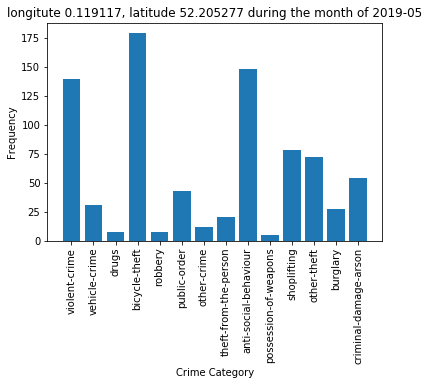

In [13]:
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(categories_freq))

plt.bar(x_pos, categories_freq.values())
plt.xticks(x_pos, categories_freq.keys(), rotation='vertical')
plt.xlabel("Crime Category")
plt.ylabel("Frequency")
plt.title("longitute {}, latitude {} during the month of {}".format(lat,long,year_month))
plt.show()

## Produce scatter plot of a few or all of the crime categories over time in the year of 2019 near Dow

Gather the data first

In [14]:
import json
import requests
import numpy as np

lat, long = 52.2001128, 0.125987 # Downing College
categories_freq_2019 = {} # Store  frequency of crimes for each category in the year of 2019
end_month = 9 # It seems to be only reported up till 10
for month in range (1,end_month+1):
    # year-month of interest
    year_month = '2019-{:02d}'.format(month)
    print(year_month)

    # Construct request URL string
    url = "https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}".format(lat, long, year_month)

    # Fetch data from https://data.police.uk
    r = requests.get(url)
    crime_data = r.json()
    
    # Iterate over all reports
    for report in crime_data:
        # Get category type
        category = report['category']

        if category in categories_freq_2019:
            # Increment counter here
            categories_freq_2019[category][month-1]+=1
        else:
            # Add category to dictionary here
            categories_freq_2019[category]=[0]*end_month # Add end_month entries for each new category 
            categories_freq_2019[category][month-1]=1
            
print("Done Sorting all that data")

2019-01
2019-02
2019-03
2019-04
2019-05
2019-06
2019-07
2019-08
2019-09
Done Sorting all that data


Plot the data on a line graph
Note that data isn't rly legible, so maybe only show a few graphs at a time

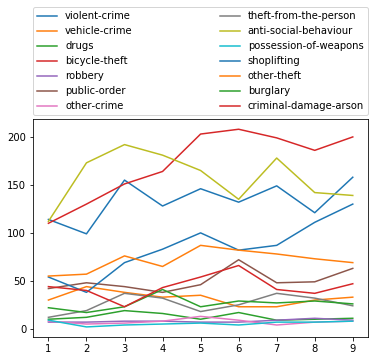

In [15]:
#Plot line of bikes stolen against time
x = np.arange(end_month)
x+=1
for key, value in categories_freq_2019.items():
    plt.plot(x, value, label=key)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.) # Source: https://matplotlib.org/1.3.1/users/legend_guide.html
plt.show()

Produce plot showing the graph grow with a slider

In [16]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

@interact(mon=(1,end_month,1))
def plot(mon=5):
    x = np.arange(mon)
    x+=1 # To ensure it starts from 1
    for key, value in categories_freq_2019.items():
        plt.plot(x, value[:mon], label=key)
        plt.xlim(1,end_month)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.) # Source: https://matplotlib.org/1.3.1/users/legend_guide.html
    plt.show()

interactive(children=(IntSlider(value=5, description='mon', max=9, min=1), Output()), _dom_classes=('widget-in…

Here is a compact version using dictionary member functions (it will be visible when solutions are released).

In [17]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 